In [1]:
# import all libraries
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style ="ticks")
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler

In [2]:
#Load the dataset
df = pd.read_csv('/home/ds8/Downloads/lab2_data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 1. make a list of categorical & numerical columns in the data

In [3]:
list_num = list(df.describe())
list_cat = list(df.describe(include='O'))

print(list_num)
print(list_cat)

['total_bill', 'tip', 'size']
['sex', 'smoker', 'day', 'time']


* We came to know that 'total_bill','tip' & 'size' are numerical columns.
* we can see that 'sex','smoker','day' & 'time' are categorical columns.

# Q. 2 Compute the average bill amount for each day

In [4]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

# Q. 3 Which gender is more generous in giving tips ?

In [5]:
df.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

** This shows that Male are more generous in giving tips.

# Q.4 According to the data,were there more customers for dinner or lunch ?

In [6]:
df.groupby('time')['size'].count()

time
Dinner    176
Lunch      68
Name: size, dtype: int64

** There are more customers for Dinner

# Q.5 Based on the statastical summary, comment on the variable 'tip'

In [7]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

* From this result, we came to know IQR,which is 
* we came to know min, max, Mean and standard deviation.
* 50% of population has given tip < 2.90
* This shows that 75 % of total tips are below 3.5625,hence the max value is the outlier.
* As Mean is slighlty greater than median, data is slightly skewed as difference is very less.

# Q.6 Find the busiest day in terms of the orders ?

In [8]:
df.day.mode()

0    Sat
Name: day, dtype: object

* Saturday is the busiest day in terms of orders.

In [9]:
df.groupby('day')['size'].sum().sort_values()

day
Fri      40
Thur    152
Sun     216
Sat     219
Name: size, dtype: int64

* Saturday is the busiest day in terms of orders.

# Q.7 is the variable 'total_bill' skewed?

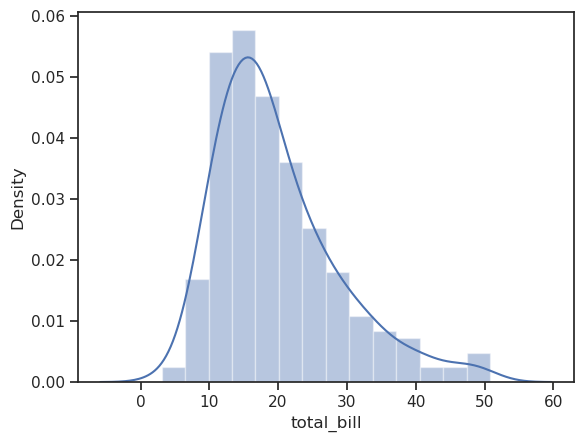

In [10]:
df.skew()
sns.distplot(df['total_bill'])
plt.show()

* it is right sided skewed. ( Positive skewness)

In [11]:
df.skew()

total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

# Q.8 Is the tip amount dependent on the total bill ?

In [12]:
df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


* this shows that as total bill increases, tip amount is also increases. this shows positive relationship.

<Axes: xlabel='total_bill', ylabel='tip'>

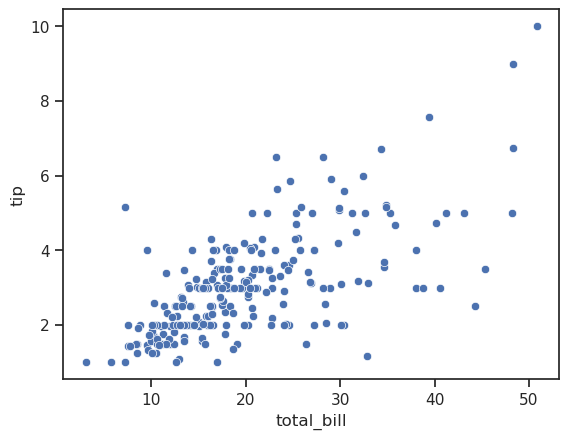

In [13]:
sns.scatterplot(x='total_bill',y='tip',data=df)

* This map shows higher is the total bill amount, more is the tip amount.

# Q.9 What is the % of males & females in the dataset?

In [14]:
df['sex'].value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

<Axes: ylabel='sex'>

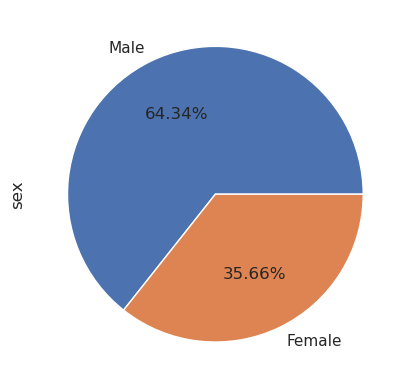

In [15]:
df['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')

# Q.10 Compute the gender-wise count based on smoking habits and display it in the plot

In [16]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: smoker, dtype: int64

In [17]:
pd.crosstab(df['smoker'],df['sex'])

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


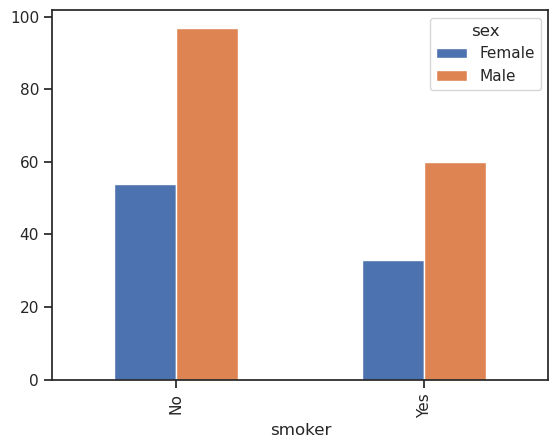

In [18]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

# Q.11 Calculate the avg tip amount given for diff.days & display in plot

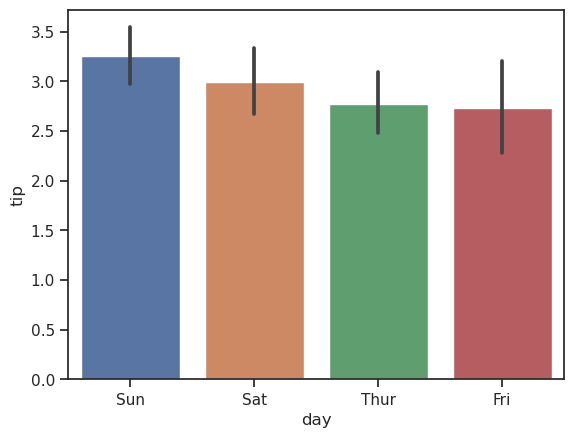

In [19]:
df.groupby('day')['tip'].mean()
sns.barplot(x='day',y='tip', data=df)
plt.show()

# 12. Is the average bill amount dependent on the size of the group?

In [20]:
df.groupby('size')['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

<Axes: xlabel='size'>

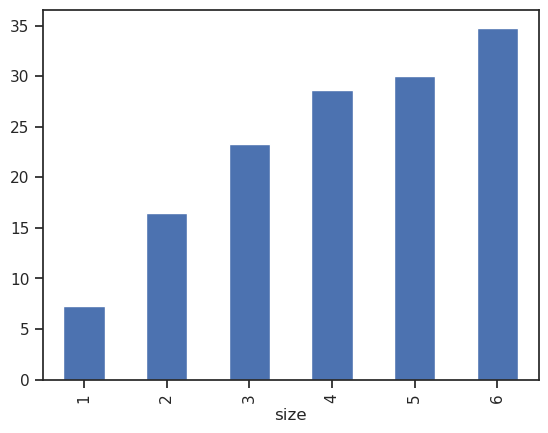

In [21]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')

* yes,average bill amount is dependent upon size of group.

# Q.13 Plot a horizontal boxplot to compare the bill amount based on gender

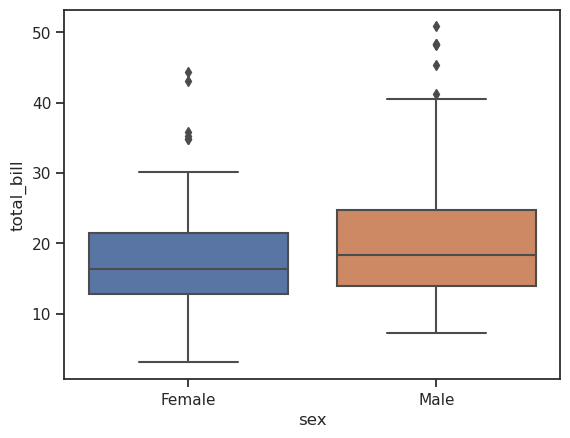

In [22]:
sns.boxplot(x='sex',y='total_bill',data=df)
plt.show()

* there are few outliers for male & female.

# Q.14 Find the maximum bill amount for lunch & dinner on Saturday & Sunday

In [23]:
df1 = df.groupby(['time','day'], as_index=False)['total_bill'].max()
df1[(df1['day'] =='Sat') | (df1['day'] == 'Sun')]

,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


 # Q.15. Compute the percentage of missing values in the dataset.

In [24]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

 # Q 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them

In [25]:
len(df[df.duplicated()])

1

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
len(df[df.duplicated()])

0

# Q. 17. Is there are any outliers present in the column 'total_bill'? 

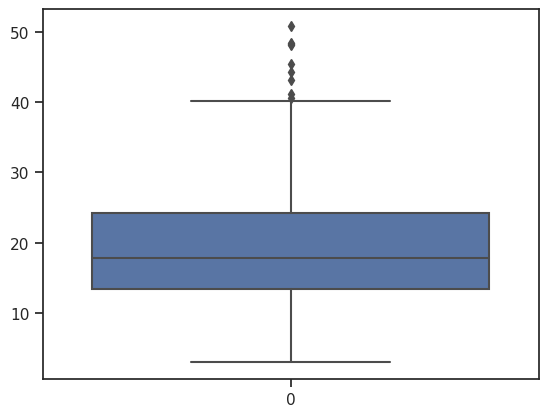

In [28]:
sns.boxplot(df['total_bill'])
plt.show()

In [29]:
# removing outliers
df['total_bill_trans'] = np.log(df['total_bill'])

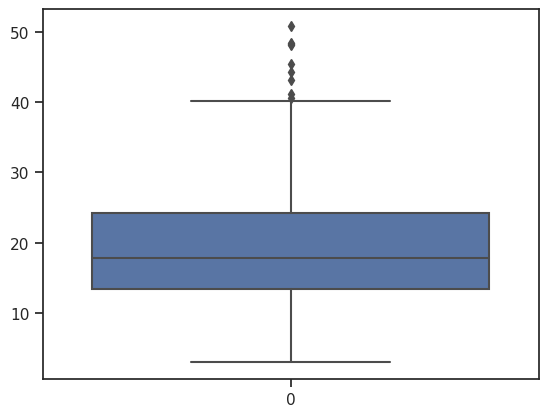

In [30]:
# replot after removing outliers
sns.boxplot(df['total_bill'])
plt.show()

 # 18. Is there are any outliers present in the column 'tip'? 

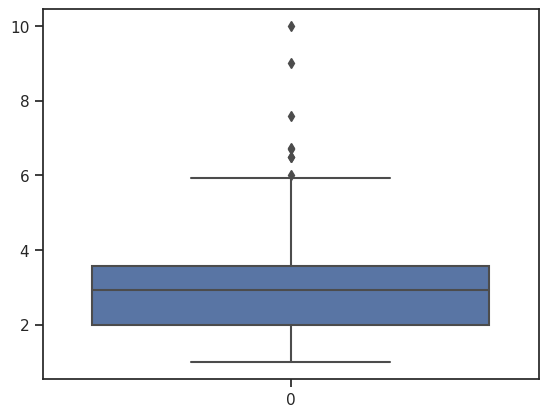

In [31]:
sns.boxplot(df['tip'])
plt.show()

In [32]:
Q1 = df['tip'].quantile(0.25)
Q3 =df['tip'].quantile(0.75)

IQR = Q3 - Q1

lower_whisker = Q1 -(1.5*IQR)
upper_whisker = Q3 + (1.5*IQR)

In [33]:
df_out = df.loc[ (df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)]

# Q.19  Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [34]:
df2 = pd.get_dummies(df,drop_first=True)
df2.head()

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,0,0,0,1,0,0
1,10.34,1.66,3,2.336020,1,0,0,1,0,0
2,21.01,3.50,3,3.044999,1,0,0,1,0,0
3,23.68,3.31,2,3.164631,1,0,0,1,0,0
4,24.59,3.61,4,3.202340,0,0,0,1,0,0


In [35]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_trans
0,16.99,1.01,Female,No,Sun,Dinner,2,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,3.202340


# Q.20 check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [36]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max-tb_min
print(range_)

47.74


In [37]:
mm = MinMaxScaler()


In [38]:
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [39]:
tb_mm_max = df['total_bill_mm'].max()
tb_mm_min = df['total_bill_mm'].min()
range_ = tb_mm_max-tb_mm_min
print(range_)

0.9999999999999999


# Q.21 Load the dataset again by giving the name of the dataframe as \"tips_df\"

In [40]:
tips_df = pd.read_csv('/home/ds8/Downloads/lab2_data/tips.csv')
tips_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [41]:
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

# 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
    
mm = MinMaxScaler()
 
X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.transform(X_test.iloc[:,:2])

(170, 6) (74, 6)
(170,) (74,)


ValueError: could not convert string to float: 'Female'

# 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)
print('r2-score test:', r2_score(y_test,pred))